In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# IMPORT DATA 

In [ ]:
training_df=pd.read_csv('/content/Training_Data_Set.csv')
training_df.head()


,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [ ]:
testing_df=pd.read_csv('/content/Test_Data_Set.csv')
testing_df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


# Dataset descriptions

In [ ]:
training_df.shape

(53515, 17)

In [ ]:
testing_df.shape

(5615, 16)

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

Description of each column/Features
Id: A unique identifier for each car in the dataset.

Maker: The brand or manufacturer of the car.

Model: The specific model or version of the car.

Location: The location of the car, which may refer to a dealership or the location of the owner.

Distance: The distance traveled by the car, which may be indicated in kilometers 

Owner Type: The type of owner of the car.

Manufacture Year: The year when the car was manufactured.

Age of Car: The age of the car, which can be calculated by subtracting the manufacture year from the current year.

Engine Displacement: The size of the engine in cubic centimeters (cc) or liters.

Engine Power: The power output of the engine, typically measured in horsepower (hp) or kilowatts (kW).

Body Type: The type of body or design of the car

Vroom Audit Rating: A rating system used to evaluate the condition or quality of the car.

Transmission: The type of transmission used in the car, such as manual or automatic.

Door Count: The number of doors in the car, which may include the trunk or hatchback door.

Seat Count: The number of seats in the car, including the driver's seat.

Fuel Type: The type of fuel used by the car, such as petrol or diesel

Price: The price of the car, typically in a specific currency.




There are few features that has null values that needs to be cleaned,also few features needs to be transformed into numerical data types from categorical to feed into model


In [ ]:
training_df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [ ]:
testing_df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

In [ ]:
data_sets = [training_df, testing_df]

# Data Cleaning and Transformation 

In [ ]:
#Drop Id and Price from the training features
for df in data_sets:
  df.drop(columns=['Id'],inplace=True)

In [ ]:
print('Null values for each column')
training_df.isnull().sum()

Null values for each column


Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [ ]:
testing_df.isnull().sum()

Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [ ]:
for  df in data_sets:
  df['Distance ']=df['Distance '].fillna(df['Distance '].mean())

In [ ]:
training_df['Distance ']

0        9.454626e+04
1        2.775000e+04
2        4.600000e+04
3        4.394900e+04
4        5.952400e+04
             ...     
53510    2.933400e+04
53511    2.236310e+05
53512    2.550000e+04
53513    1.195500e+06
53514    1.420000e+05
Name: Distance , Length: 53515, dtype: float64

In [ ]:
for df in data_sets:
  df['engine_power']=df['engine_power'].fillna(df['engine_power'].mean())

In [ ]:
training_df['engine_power']

0        147.0
1         51.0
2        105.0
3        140.0
4        180.0
         ...  
53510     77.0
53511     77.0
53512    105.0
53513     93.0
53514    173.0
Name: engine_power, Length: 53515, dtype: float64

In [ ]:
#Since body_type is categorical, and a lot of these data are missing...we need to treat it
training_df['body_type'].value_counts()

compact    4127
van           9
Name: body_type, dtype: int64

In [ ]:
testing_df['body_type'].value_counts()

compact    421
van          1
Name: body_type, dtype: int64

In [ ]:
#let's drop the column since  it doesnot  make sense to fill the missing data 
for df in data_sets:
  df.drop(columns=['body_type'],inplace=True)

In [ ]:
training_df['model'].value_counts()

octavia     12619
superb       3195
yaris        3176
qashqai      2854
x3           2779
x1           2420
i30          2047
q5           2039
x5           1979
yeti         1898
panda        1769
q3           1736
coupe        1710
micra        1676
auris        1666
avensis      1512
aygo         1486
rapid        1409
roomster     1322
q7           1245
citigo       1120
juke          955
tt            903
Name: model, dtype: int64

In [ ]:
training_df['Location'].value_counts()

Coimbatore    4976
Kochi         4969
Bangalore     4878
Jaipur        4870
Kolkata       4868
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4824
Hyderabad     4804
Ahmedabad     4770
Name: Location, dtype: int64

In [ ]:
training_df['Owner Type'].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

In [ ]:
training_df['transmission'].value_counts()

man     36734
auto    16743
Name: transmission, dtype: int64

In [ ]:
training_df['door_count'].value_counts()

4       33808
5        7630
None     7534
2        4310
3         185
6           8
1           2
Name: door_count, dtype: int64

In [ ]:
training_df['seat_count'].value_counts()

5       38824
None     8511
4        4467
7         852
2         725
3         109
6          23
9           2
1           1
8           1
Name: seat_count, dtype: int64

In [ ]:
training_df['fuel_type'].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

In [ ]:
training_df.isnull().sum()

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   object 
 1   model                5615 non-null   object 
 2   Location             5615 non-null   object 
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   object 
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   object 
 11  door_count           5615 non-null   object 
 12  seat_count           5615 non-null   object 
 13  fuel_type            5615 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 614.3+ KB


# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Graph')

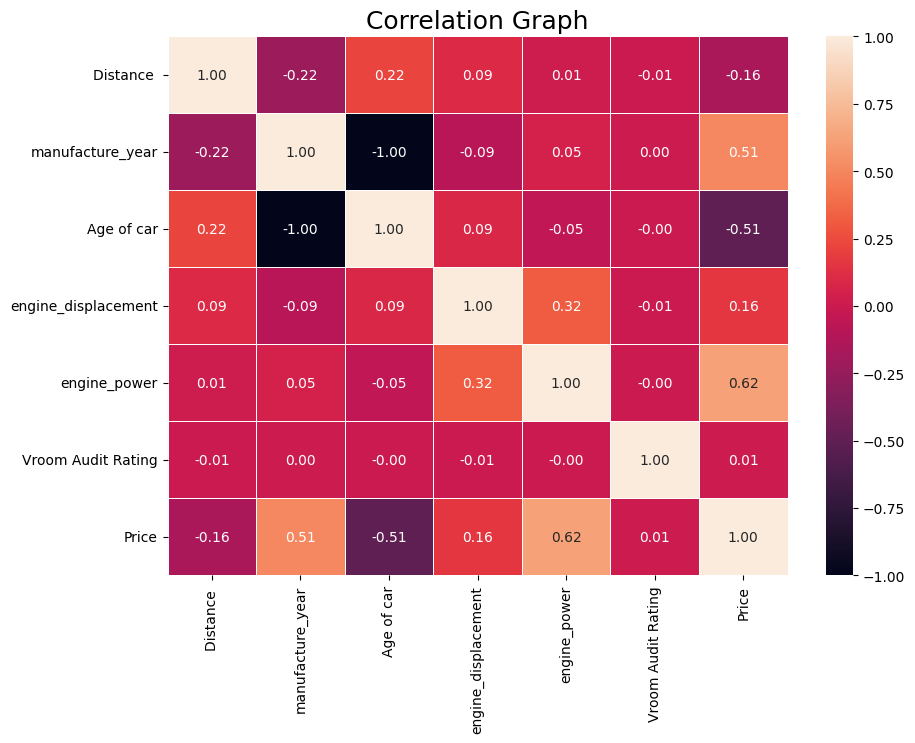

In [ ]:
#Heat map
plt.figure(figsize=(10,7))
sns.heatmap(training_df.corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

# Feature Engineering 

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  object 
 1   model                53515 non-null  object 
 2   Location             53515 non-null  object 
 3   Distance             53515 non-null  float64
 4   Owner Type           53515 non-null  object 
 5   manufacture_year     53515 non-null  int64  
 6   Age of car           53515 non-null  int64  
 7   engine_displacement  53515 non-null  int64  
 8   engine_power         53515 non-null  float64
 9   Vroom Audit Rating   53515 non-null  int64  
 10  transmission         53515 non-null  object 
 11  door_count           53515 non-null  object 
 12  seat_count           53515 non-null  object 
 13  fuel_type            53515 non-null  object 
 14  Price                53515 non-null  float64
dtypes: float64(3), int64(4), object(8)
m

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label_lst = ['Maker','model','Location', 'Owner Type','transmission','fuel_type']
for col in label_lst : 
    training_df[col] = label.fit_transform(training_df[col])

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  int64  
 1   model                53515 non-null  int64  
 2   Location             53515 non-null  int64  
 3   Distance             53515 non-null  float64
 4   Owner Type           53515 non-null  int64  
 5   manufacture_year     53515 non-null  int64  
 6   Age of car           53515 non-null  int64  
 7   engine_displacement  53515 non-null  int64  
 8   engine_power         53515 non-null  float64
 9   Vroom Audit Rating   53515 non-null  int64  
 10  transmission         53515 non-null  int64  
 11  door_count           53515 non-null  object 
 12  seat_count           53515 non-null  object 
 13  fuel_type            53515 non-null  int64  
 14  Price                53515 non-null  float64
dtypes: float64(3), int64(10), object(2)


In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   object 
 1   model                5615 non-null   object 
 2   Location             5615 non-null   object 
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   object 
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   object 
 11  door_count           5615 non-null   object 
 12  seat_count           5615 non-null   object 
 13  fuel_type            5615 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 614.3+ KB


In [ ]:

for col in label_lst : 
    testing_df[col] = label.fit_transform(testing_df[col])

In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   int64  
 1   model                5615 non-null   int64  
 2   Location             5615 non-null   int64  
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   int64  
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   int64  
 11  door_count           5615 non-null   object 
 12  seat_count           5615 non-null   object 
 13  fuel_type            5615 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 614.3+ KB


In [ ]:
category_column = ['door_count','seat_count']  # replace with the name of the categorical column
category_dict={'None':0,'1':1,'2':2,
              '3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

for col in category_column :
  training_df[col] = training_df[col].map(category_dict)


In [ ]:
training_df.head()

,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,6,8,0,94546.262446,2,1964,55,1964,147.0,8,1,0,0,1,543764.25
1,2,9,0,27750.000000,3,2012,7,1242,51.0,6,1,4,4,1,401819.25
2,1,18,5,46000.000000,3,2014,5,1995,105.0,7,0,4,5,0,2392855.50
3,5,6,9,43949.000000,3,2011,8,1618,140.0,7,1,4,5,1,958606.50
4,1,20,6,59524.000000,1,2012,7,2993,180.0,7,0,4,5,0,3085561.50


In [ ]:
for col in category_column :
  testing_df[col] = testing_df[col].map(category_dict)


In [ ]:
testing_df.head()

,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,6,8,9,150000.0,0,2007,12,1595,75.0,5,1,4,5,1
1,6,14,3,29376.0,3,2014,5,1598,77.0,4,1,4,5,0
2,6,8,3,30563.0,2,2014,5,1968,110.0,5,1,5,5,0
3,0,10,4,8650.0,1,2015,4,1968,110.0,8,0,4,5,0
4,0,17,2,6400.0,3,2015,4,1984,169.0,4,0,2,0,1


# TRAIN THE MODEL

In [ ]:
y=training_df['Price']
training_df.drop(['Price'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(training_df, y, test_size=0.3,random_state=42)

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import joblib

lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
abr = DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import r2_score
regression_models = [lr,rfr,gbr,dtr,abr]
score_train=[]
score_test=[]

for model in regression_models : 
    model.fit(X_train,y_train)
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))
    
    filename = type(model).__name__ + '.pkl'
    joblib.dump(model, filename)

    

In [ ]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1,2,3,4
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor
1,0.688543,0.987907,0.909284,0.999931,0.999931
2,0.715331,0.928507,0.929993,0.876628,0.869796


In [ ]:
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.688543,0.715331
1,Random Forest Regressor,0.987907,0.928507
2,Gradient Boosting Regressor,0.909284,0.929993
3,Decision Tree Regressor,0.999931,0.876628
4,AdaBoostRegressor,0.999931,0.869796


PREDICTION DATA for the actual Testdata

In [ ]:
model = joblib.load('RandomForestRegressor.pkl')
# Make predictions on the test data
predictions = model.predict(testing_df)


In [ ]:
testing_df=pd.read_csv('/content/Test_Data_Set.csv')
testing_df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [ ]:
output_results = pd.DataFrame({'Id': testing_df['Id'], 'Price': predictions})

In [ ]:
output_results.to_csv('predictions_group_AasthaSankitaJunee.csv',index=False)